# DRAKE'S EQUATION SIMULATOR

### SOBRE ESTE SCRIPT

### O QUE É?

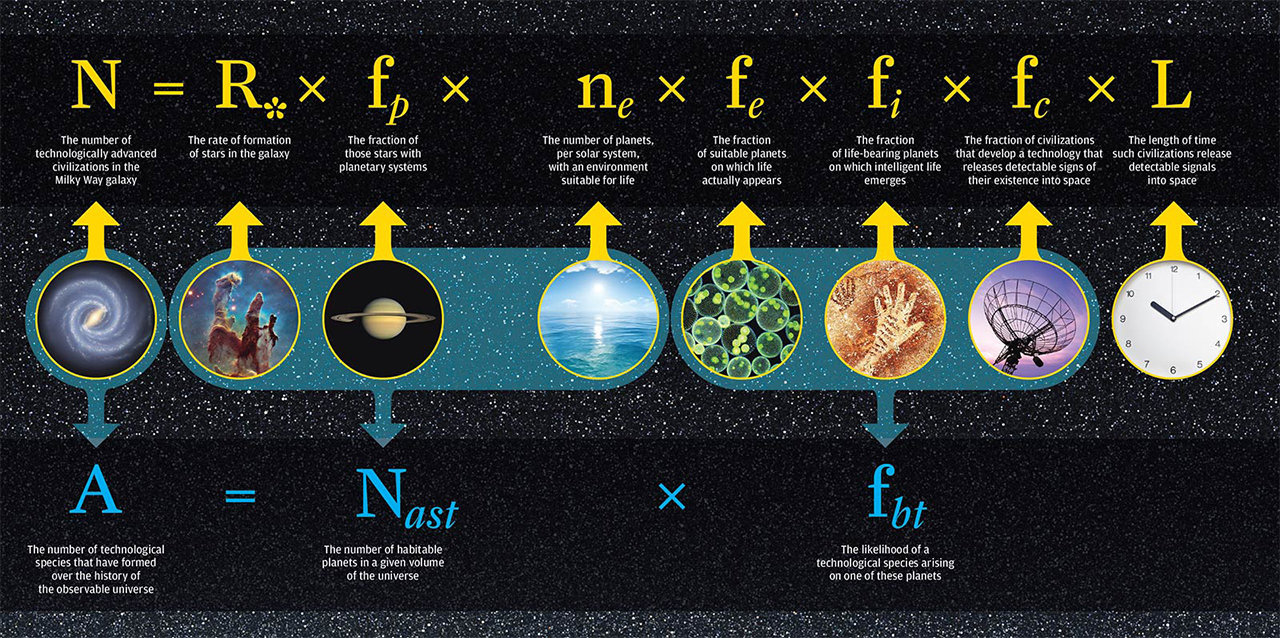

https://exoplanets.nasa.gov/news/1350/are-we-alone-in-the-universe-revisiting-the-drake-equation/

### COMO SURGIU?

### CÓDIGO

#### Bibliotecas

## 1. Distribuição de Civilizações em uma Galáxia Modelada

Iniciamos o código que simula a distribuição de civilizações em uma galáxia modelada como um disco 3D. Ele utiliza coordenadas polares e arredonda essas coordenadas para determinar a probabilidade de detecção de sobreposição de civilizações. Aqui estão as principais funções e o que elas fazem:

1. `random_polar_coordinates_xyz()`: Gera coordenadas aleatórias uniformemente distribuídas dentro de um disco 3D.

2. `arredondado(n, base)`: Arredonda um número para o número mais próximo designado pela base.

3. `distribuir_civilizacoes()`: Distribui locais (coordenadas xyz) no modelo de disco galáctico e retorna uma lista desses locais.

4. `arredondar_locais_civs(locais_civs)`: Arredonda os locais xyz das civilizações para a distância de detecção (um raio cúbico). Isso ajuda a simular a capacidade de detecção de civilizações sobrepostas.

5. `calcular_probabilidade_detecção(locais_civs_arredondados)`: Conta a sobreposição de locais arredondados e calcula a probabilidade de detecção de sobreposição.

6. `main()`: Chama as funções anteriores e imprime os resultados, incluindo o comprimento da lista de locais antes e depois do arredondamento, a contagem agrupada de locais, e a probabilidade de detecção.

A simulação inclui uma etapa de controle de qualidade que imprime os três primeiros locais antes e depois do arredondamento, permitindo verificar como as coordenadas são afetadas por esse processo.

A principal aplicação desse código é modelar a distribuição de civilizações em uma galáxia e avaliar a probabilidade de detectar civilizações que estão suficientemente próximas umas das outras.

In [ ]:
import math
from random import uniform, random
from collections import Counter

# unidades de comprimento em anos-luz
DISC_RADIUS = 50000
DISC_HEIGHT = 1000
NUM_CIVS = 15600000
DETECTION_RADIUS = 16


def random_polar_coordinates_xyz():
    """Gerar ponto xyz aleatório uniforme dentro de um disco 3D."""
    r = random()
    theta = uniform(0, 2 * math.pi)
    x = round(math.sqrt(r) * math.cos(theta) * DISC_RADIUS, 3)
    y = round(math.sqrt(r) * math.sin(theta) * DISC_RADIUS, 3)
    z = round(uniform(0, DISC_HEIGHT), 3)
    return x, y, z


def arredondado(n, base):
    """Arredondar um número para o número mais próximo designado pelo parâmetro da base."""
    return int(round(n/base) * base)


def distribuir_civilizacoes():
    """Distribuir locais xyz no modelo de disco galáctico e retornar lista."""
    locais_civs = []
    while len(locais_civs) < NUM_CIVS:
        loc = random_polar_coordinates_xyz()
        locais_civs.append(loc)
    return locais_civs


def arredondar_locais_civs(locais_civs):
    """Arredondar locais xyz e retornar lista de locais arredondados."""
    # converter raio para dimensões cúbicas:
    distância_detecção = round((4 / 3 * math.pi * DETECTION_RADIUS**3)**(1/3))
    print("\nraio de detecção = {} AL".format(DETECTION_RADIUS))
    print("distância de detecção cúbica = {} AL".format(distância_detecção))

    # arredondar xyz da civilização para a distância de detecção
    locais_civs_arredondados = []

    for x, y, z in locais_civs:
        i = arredondado(x, distância_detecção)
        j = arredondado(y, distância_detecção)
        k = arredondado(z, distância_detecção)
        locais_civs_arredondados.append((i, j, k))

    return locais_civs_arredondados


def calcular_probabilidade_detecção(locais_civs_arredondados):
    """Contar locais e calcular probabilidade de valores duplicados."""
    contagem_sobreposição = Counter(locais_civs_arredondados)
    contagem_agrupada = Counter(contagem_sobreposição.values())
    num_single_civs = contagem_agrupada[1]
    probabilidade = 1 - (num_single_civs / NUM_CIVS)

    return contagem_agrupada, probabilidade


def main():
    """Chamar funções e imprimir resultados."""
    locais_civs = distribuir_civilizacoes()
    locais_civs_arredondados = arredondar_locais_civs(locais_civs)
    contagem_agrupada, probabilidade_detecção = calcular_probabilidade_detecção(locais_civs_arredondados)
    print("comprimento civ_locs pré-arredondado = {}".format(len(locais_civs)))
    print("comprimento de locais_civs_arredondados = {}"
          .format(len(locais_civs_arredondados)))
    print("contagem_agrupada = {}\n".format(contagem_agrupada))
    print("probabilidade de detecção = {0:.3f}".format(probabilidade_detecção))

    # Etapa de controle de qualidade para verificar o arredondamento
    print("\nPrimeiros 3 locais pré e pós-arredondamento:\n")
    for i in range(3):
        print("pré-arredondamento: {}".format(locais_civs[i]))
        print("pós-arredondamento: {} \n".format(locais_civs_arredondados[i]))


if __name__ == '__main__':
    main()

## 2. Probabilidade de Detecção

Agora criamos uma simulação para modelar a probabilidade de haver pelo menos **duas civilizações avançadas** em locais equivalentes em uma galáxia. E as principais características e o que cada parte faz:

1. `NUM_EQUIV_VOLUMES`: Número de locais nos quais as civilizações podem ser colocadas.

2. `MAX_CIVS`: Número máximo de civilizações avançadas a serem consideradas.

3. `TRIALS`: Número de simulações a serem realizadas para cada número específico de civilizações.

4. `CIV_STEP_SIZE`: Tamanho do passo para contar civilizações. Define quantas civilizações avançadas adicionais são consideradas a cada iteração.

5. `x` e `y`: Listas que armazenam os valores de x (número de civilizações por volume) e y (probabilidade de haver pelo menos duas civilizações em locais equivalentes).

O código realiza as seguintes ações:

- Itera sobre diferentes números de civilizações avançadas, aumentando de acordo com `CIV_STEP_SIZE`.
  
- Para cada número de civilizações, realiza várias simulações (`TRIALS`) onde distribui aleatoriamente as civilizações em locais equivalentes.

- Conta quantos locais têm pelo menos duas civilizações em cada simulação.

- Calcula a probabilidade de haver pelo menos duas civilizações em locais equivalentes.

- Imprime a razão de civilizações por volume vs. a probabilidade de pelo menos duas civilizações por localização.

- Realiza um ajuste polinomial de 4ª ordem nos dados coletados (razão de civilizações por volume vs. probabilidade) e exibe o gráfico.

Usamos esse código para explorar a relação entre a densidade de civilizações e a probabilidade de ocorrência de sobreposições em locais equivalentes na galáxia simulada. O ajuste polinomial é uma tentativa de encontrar uma função que descreva essa relação.

In [ ]:
from random import randint
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

NUM_EQUIV_VOLUMES = 1000  # número de locais nos quais colocar civilizações
MAX_CIVS = 5000  # número máximo de civilizações avançadas
TRIALS = 1000  # número de vezes para modelar um determinado número de civilizações
CIV_STEP_SIZE = 100  # tamanho do passo para contar civilizações
x = []  # valores de x para ajuste polinomial
y = []  # valores de y para ajuste polinomial

for num_civs in range(2, MAX_CIVS + 2, CIV_STEP_SIZE):
    civs_per_vol = num_civs / NUM_EQUIV_VOLUMES
    num_single_civs = 0
    for trial in range(TRIALS):
        locations = []  # volumes equivalentes contendo uma civilização
        while len(locations) < num_civs:
            location = randint(1, NUM_EQUIV_VOLUMES)
            locations.append(location)
        overlap_count = Counter(locations)
        overlap_rollup = Counter(overlap_count.values())
        num_single_civs += overlap_rollup[1]

prob = 1 - (num_single_civs / (num_civs * TRIALS))

# imprime a razão de civs por volume vs. probabilidade de 2+ civs por localização
print("{:.4f}   {:.4f}".format(civs_per_vol, prob))
x.append(civs_per_vol)
y.append(prob)

coefficients = np.polyfit(x, y, 4)  # ajuste polinomial de 4ª ordem
p = np.poly1d(coefficients)
print("\n{}".format(p))
xp = np.linspace(0, 5)
_ = plt.plot(x, y, '.', xp, p(xp), '-')
plt.ylim(-0.5, 1.5)
plt.show()

## 3. Expansão de Galáxia

Esse código utiliza a biblioteca Tkinter para criar uma representação visual da Via Láctea com braços espirais, nebulosas estelares e modela a expansão do império a partir do planeta natal ao longo do tempo. O loop principal Tkinter (`root.mainloop()`) é utilizado para exibir a janela e manter a interface gráfica interativa.

1. `LOCALIZACAO_PLANETA_NATAL`: Coordenadas do planeta natal do império no mapa.

2. `MAX_ANOS`: Número máximo de anos a serem simulados.

3. `VELOCIDADE`: Velocidade média de expansão como uma fração da velocidade da luz.

4. `UNIDADE`: Unidade de escala para o desenho.

5. `root` e `c`: Configuram a janela principal e o canvas para a exibição da galáxia.

6. `DISC_RADIUS`: Dimensões reais da Via Láctea (em anos-luz).

7. `coordenadas_polares()`: Gera pontos aleatórios uniformes dentro de um disco para exibição 2D.

8. `espirais()`: Constrói braços espirais para a exibição Tkinter usando a fórmula do espiral logarítmico.

9. `nebulosa_estelar()`: Distribui aleatoriamente estrelas tênues em Tkinter no disco galáctico.

10. `modelo_expansao()`: Modela a expansão do império a partir do planeta natal com anéis concêntricos.

11. `principal()`: Gera a exibição da galáxia, modela a expansão do império e executa o loop principal do Tkinter.

12. `if __name__ == '__main__':`: Garante que o código só é executado se este arquivo for executado diretamente, não se for importado como um módulo.

In [ ]:
import tkinter as tk
import time
from random import randint, uniform, random
import math

#=============================================================================
# ENTRADA PRINCIPAL

# localização do planeta natal do império galáctico no mapa:
LOCALIZACAO_PLANETA_NATAL = (0, 0)

# número máximo de anos a serem simulados:
MAX_ANOS = 10000000

# velocidade média de expansão como fração da velocidade da luz:
VELOCIDADE = 0.005

# unidades de escala
UNIDADE = 200

#======================================================================

# configurar o canvas de exibição
root = tk.Tk()
root.title("Galáxia Via Láctea")
c = tk.Canvas(root, width=1000, height=800, bg='black')
c.grid()
c.configure(scrollregion=(-500, -400, 500, 400))
    
# Dimensões reais da Via Láctea (em anos-luz)
DISC_RADIUS = 50000

disc_radius_scaled = round(DISC_RADIUS/UNIDADE)

def coordenadas_polares():
    """Gera ponto x, y uniformemente aleatório dentro de um disco para exibição 2D."""
    r = random()
    theta = uniform(0, 2 * math.pi)
    x = round(math.sqrt(r) * math.cos(theta) * disc_radius_scaled)
    y = round(math.sqrt(r) * math.sin(theta) * disc_radius_scaled)
    return x, y
    
def espirais(b, r, rot_fac, fuz_fac, braço):
    """Constrói braços espirais para exibição Tkinter usando a fórmula do espiral logarítmico.

    b = constante arbitrária na equação do espiral logarítmico
    r = raio escalado do disco galáctico
    rot_fac = fator de rotação
    fuz_fac = deslocamento aleatório na posição da estrela no braço, aplicado à variável 'fuzz'
    braço = braço espiral (0 = braço principal, 1 = estrelas em rastro)
    """
    estrelas_espirais = []
    fuzz = int(0.030 * abs(r))  # desloca aleatoriamente as localizações das estrelas
    theta_max_degrees = 520
    for i in range(theta_max_degrees):  # range(0, 700, 2) para nenhum buraco negro
        theta = math.radians(i)
        x = r * math.exp(b*theta) * math.cos(theta + math.pi * rot_fac)\
            + randint(-fuzz, fuzz) * fuz_fac
        y = r * math.exp(b*theta) * math.sin(theta + math.pi * rot_fac)\
            + randint(-fuzz, fuzz) * fuz_fac
        estrelas_espirais.append((x, y))
    for x, y in estrelas_espirais:
        if braço == 0 and int(x % 2) == 0:
            c.create_oval(x-2, y-2, x+2, y+2, fill='white', outline='')
        elif braço == 0 and int(x % 2) != 0:
            c.create_oval(x-1, y-1, x+1, y+1, fill='white', outline='')
        elif braço == 1:
            c.create_oval(x, y, x, y, fill='white', outline='')

def nebulosa_estelar(escalar):
    """Distribui aleatoriamente estrelas tênues em Tkinter no disco galáctico.

    disc_radius_scaled = raio do disco galáctico escalado para o diâmetro da bolha de rádio
    escalar = multiplicador para variar o número de estrelas postadas
    """
    for i in range(0, disc_radius_scaled * escalar):
        x, y = coordenadas_polares()
        c.create_text(x, y, fill='white', font=('Helvetica', '7'), text='.')

def modelo_expansao():
    """Modela a expansão do império a partir do planeta natal com anéis concêntricos."""
    r = 0  # raio a partir do planeta natal
    text_y_loc = -290
    x, y = LOCALIZACAO_PLANETA_NATAL
    c.create_oval(x-5, y-5, x+5, y+5, fill='red')
    incremento = round(MAX_ANOS / 10)  # intervalo de anos para postar círculos
    c.create_text(-475, -350, anchor='w', fill='red', text='Incremento = {:,}'
                  .format(incremento))
    c.create_text(-475, -325, anchor='w', fill='red',
                  text='Velocidade como fração da Luz = {:,}'.format(VELOCIDADE))
    
    for anos in range(incremento, MAX_ANOS + 1, incremento):
        time.sleep(0.5)  # atraso antes de postar um novo círculo de expansão
        viajado = VELOCIDADE * incremento / UNIDADE
        r = r + viajado
        c.create_oval(x-r, y-r, x+r, y+r, fill='', outline='red', width='2')
        c.create_text(-475, text_y_loc, anchor='w', fill='red',
                      text='Anos = {:,}'.format(anos))
        text_y_loc += 20
        # atualiza o canvas para o novo círculo; não é mais necessário o mainloop()
        c.update_idletasks()
        c.update()

def principal():  
    """Gera a exibição da galáxia, modela a expansão do império, executa o mainloop."""  
    espirais(b=-0.3, r=disc_radius_scaled, rot_fac=2, fuz_fac=1.5, braço=0)
    espirais(b=-0.3, r=disc_radius_scaled, rot_fac=1.91, fuz_fac=1.5, braço=1)
    espirais(b=-0.3, r=-disc_radius_scaled, rot_fac=2, fuz_fac=1.5, braço=0)
    espirais(b=-0.3, r=-disc_radius_scaled, rot_fac=-2.09, fuz_fac=1.5, braço=1)
    espirais(b=-0.3, r=-disc_radius_scaled, rot_fac=0.5, fuz_fac=1.5, braço=0)
    espirais(b=-0.3, r=-disc_radius_scaled, rot_fac=0.4, fuz_fac=1.5, braço=1)
    espirais(b=-0.3, r=-disc_radius_scaled, rot_fac=-0.5, fuz_fac=1.5, braço=0)
    espirais(b=-0.3, r=-disc_radius_scaled, rot_fac=-0.6, fuz_fac=1.5, braço=1)
    nebulosa_estelar(escalar=9)

    modelo_expansao()

    # executa o loop Tkinter
    root.mainloop()

if __name__ == '__main__':
    principal()

## 4. Galáxia Fictícia

Aqui criamos uma representação visual de uma galáxia fictícia com o nome de "JonataX-1981" (hehehehe), com estrelas nos braços espirais, fios e um núcleo galáctico. A aleatoriedade nas posições e tamanhos das estrelas e fios adiciona uma aparência mais natural e caótica à representação gráfica da galáxia. Aqui estão as principais características e o que cada parte faz:

1. `root` e `c`: Configuram a janela principal e o canvas para a exibição da galáxia.

2. `oval_size`: Variável para armazenar o tamanho dos objetos ovais (representando estrelas).

3. `num_estrelas_espirais`: Número de estrelas nos braços espirais.

4. `ângulo`: Ângulo usado para determinar a posição das estrelas nos braços espirais.

5. `diâmetro_núcleo`: Diâmetro do núcleo galáctico.

6. `estrelas_espirais`: Lista para armazenar as coordenadas das estrelas nos braços espirais.

7. Construção dos braços espirais: Usa um loop para gerar coordenadas de estrelas nos braços espirais, adicionando aleatoriedade às posições e tamanhos.

8. Construção de fios: Usa um loop para gerar coordenadas de fios (ou linhas) na galáxia.

9. Construção do núcleo galáctico: Usa um loop para gerar coordenadas de estrelas no núcleo galáctico, variando os tamanhos dos objetos ovais.

10. `root.mainloop()`: Executa o loop principal do Tkinter para exibir a janela e manter a interface gráfica interativa.

In [16]:
import math
from random import randint
import tkinter

root = tkinter.Tk()
root.title("Galáxia JonataX-1981")
c = tkinter.Canvas(root, width=1000, height=800, bg='black')
c.grid()
c.configure(scrollregion=(-500, -400, 500, 400))
oval_size = 0

# construir braços espirais
num_estrelas_espirais = 500
ângulo = 3.5
diâmetro_núcleo = 120
estrelas_espirais = []
for i in range(num_estrelas_espirais):
    theta = i * ângulo
    r = math.sqrt(i) / math.sqrt(num_estrelas_espirais)
    estrelas_espirais.append((r * math.cos(theta), r * math.sin(theta)))
for x, y in estrelas_espirais:
    x = x * 350 + randint(-5, 3)
    y = y * 350 + randint(-5, 3)
    oval_size = randint(1, 3)
    c.create_oval(x-oval_size, y-oval_size, x+oval_size, y+oval_size,
                  fill='white', outline='')
        
# construir fios
fios = []
for i in range(2000):
    theta = i * ângulo
    # dividir por num_estrelas_espirais para obter faixas de poeira melhores
    r = math.sqrt(i) / math.sqrt(num_estrelas_espirais)
    estrelas_espirais.append((r * math.cos(theta), r * math.sin(theta)))
for x, y in estrelas_espirais:
    x = x * 330 + randint(-15, 10)
    y = y * 330 + randint(-15, 10)
    h = math.sqrt(x**2 + y**2)
    if h < 350:
        fios.append((x, y))
        c.create_oval(x-1, y-1, x+1, y+1, fill='white', outline='')          
    
# construir núcleo galáctico 
núcleo = []
for i in range(900):
    x = randint(-diâmetro_núcleo, diâmetro_núcleo)
    y = randint(-diâmetro_núcleo, diâmetro_núcleo)
    h = math.sqrt(x**2 + y**2)
    if h < diâmetro_núcleo - 70:
        núcleo.append((x, y))
        oval_size = randint(2, 4)
        c.create_oval(x-oval_size, y-oval_size, x+oval_size, y+oval_size,
                      fill='white', outline='')
    elif h < diâmetro_núcleo:
        núcleo.append((x, y))
        oval_size = randint(0, 2)
        c.create_oval(x-oval_size, y-oval_size, x+oval_size, y+oval_size,
                      fill='white', outline='')
    
root.mainloop()

## 5. galaxy_generator

Aqui o objetivo é interagir com os sliders e ao clicar no botão "Gerar Galáxia", a galáxia é redesenhada com base nos novos parâmetros selecionados. A imagem resultante é capturada e exibida na célula do notebook Jupyter.

1. **Funções dentro da função `gerar_galaxia`:**
   - `escalar_galaxia()`: Redimensiona as dimensões da galáxia com base no tamanho da bolha de rádio (escala).
   - `calcular_probabilidade()`: Calcula a probabilidade de detecção de civilizações galácticas com base na razão de civilizações para o volume redimensionado da galáxia.
   - `coordenadas_polares_aleatorias()`: Gera coordenadas polares aleatórias (x, y) uniformemente distribuídas dentro de um disco para exibição em 2D.
   - `espirais()`: Cria braços espirais para a representação gráfica usando a fórmula do espiral logarítmico.
   - `nebulosidade_estelar()`: Distribui aleatoriamente estrelas tênues na galáxia.

2. **Função `principal()`:** Função principal que chama as funções acima para gerar a representação gráfica da galáxia.

3. **Captura de Imagem:**
   - Usa a biblioteca `PIL` (Pillow) para capturar o conteúdo do canvas Tkinter como uma imagem.

4. **Widgets Interativos:**
   - Usa ipywidgets para criar sliders interativos para o número de civilizações e a escala da bolha de rádio.
   - Um botão interativo "Gerar Galáxia" chama a função `ao_clicar_no_botao_gerar` quando clicado.

5. **Função `ao_clicar_no_botao_gerar`:**
   - Limpa a saída atual do Jupyter Notebook.
   - Chama a função `gerar_galaxia` com os valores dos sliders.

6. **Exibição Inicial:**
   - Exibe os widgets interativos e gera a galáxia inicial com valores padrão.

In [ ]:
# Importa as bibliotecas necessárias
import tkinter as tk
from random import randint, uniform, random
import math
import ipywidgets as widgets
from IPython.display import display
from PIL import ImageGrab
import ipywidgets as widgets
from IPython.display import clear_output

# Função para gerar e exibir uma galáxia com parâmetros especificados
def gerar_galaxia(num_civs, escala):
    # Configura o canvas de exibição usando Tkinter
    root = tk.Tk()
    root.title("Galáxia Via Láctea")

    # Cria um canvas para desenhar na janela principal
    c = tk.Canvas(root, width=1000, height=800, bg='black')
    c.grid()
    c.configure(scrollregion=(-500, -400, 500, 400))

    # Dimensões reais da Via Láctea (em anos-luz)
    RAIO_DISCO = 50000
    ALTURA_DISCO = 1000
    VOL_DISCO = math.pi * RAIO_DISCO**2 * ALTURA_DISCO

    # Função para escalar as dimensões da galáxia com base no tamanho da bolha de rádio (escala)
    def escalar_galaxia():
        raio_disco_redimensionado = round(RAIO_DISCO / escala)
        volume_bolha = 4/3 * math.pi * (escala / 2)**3
        volume_disco_redimensionado = VOL_DISCO / volume_bolha
        return raio_disco_redimensionado, volume_disco_redimensionado

    # Função para calcular a probabilidade de detecção de civilizações galácticas
    def calcular_probabilidade(volume_disco_redimensionado):
        proporcao = num_civs / volume_disco_redimensionado  # razão de civilizações para o volume escalado da galáxia
        if proporcao < 0.002:  # define razões muito baixas para probabilidade 0
            probabilidade_detecao = 0
        elif proporcao >= 5:  # define razões muito altas para probabilidade 1
            probabilidade_detecao = 1
        else:
            probabilidade_detecao = -0.004757 * proporcao**4 + 0.06681 * proporcao**3 - 0.3605 * proporcao**2 + 0.9215 * proporcao + 0.00826
        return round(probabilidade_detecao, 3)

    # Função para gerar coordenadas polares aleatórias (x, y) uniformemente distribuídas dentro de um disco para exibição em 2D
    def coordenadas_polares_aleatorias(raio_disco_redimensionado):
        r = random()
        theta = uniform(0, 2 * math.pi)
        x = round(math.sqrt(r) * math.cos(theta) * raio_disco_redimensionado)
        y = round(math.sqrt(r) * math.sin(theta) * raio_disco_redimensionado)
        return x, y

    # Função para criar braços espirais para representação gráfica usando a fórmula do espiral logarítmico
    def espirais(b, r, rot_fac, fuz_fac, arm):
        estrelas_espirais = []
        fuzz = int(0.030 * abs(r))  # desloca aleatoriamente as localizações das estrelas
        theta_max_graus = 520
        for i in range(theta_max_graus):
            theta = math.radians(i)
            x = r * math.exp(b * theta) * math.cos(theta + math.pi * rot_fac) + randint(-fuzz, fuzz) * fuz_fac
            y = r * math.exp(b * theta) * math.sin(theta + math.pi * rot_fac) + randint(-fuzz, fuzz) * fuz_fac
            estrelas_espirais.append((x, y))
        for x, y in estrelas_espirais:
            if arm == 0 and int(x % 2) == 0:
                c.create_oval(x - 2, y - 2, x + 2, y + 2, fill='white', outline='')
            elif arm == 0 and int(x % 2) != 0:
                c.create_oval(x - 1, y - 1, x + 1, y + 1, fill='white', outline='')
            elif arm == 1:
                c.create_oval(x, y, x, y, fill='white', outline='')

    # Função para distribuir aleatoriamente estrelas tênues em Tkinter na galáxia
    def nebulosidade_estelar(raio_disco_redimensionado, densidade):
        for i in range(0, raio_disco_redimensionado * densidade):
            x, y = coordenadas_polares_aleatorias(raio_disco_redimensionado)
            c.create_text(x, y, fill='white', font=('Helvetica', '7'), text='.')

    # Função principal para calcular a probabilidade de detecção e exibir a galáxia
    def principal():
        raio_disco_redimensionado, volume_disco_redimensionado = escalar_galaxia()
        probabilidade_detecao = calcular_probabilidade(volume_disco_redimensionado)
        # cria 4 braços espirais principais e 4 braços em rastro na representação gráfica da galáxia
        espirais(b=-0.3, r=raio_disco_redimensionado, rot_fac=2, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=raio_disco_redimensionado, rot_fac=1.91, fuz_fac=1.5, arm=1)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=2, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=-2.09, fuz_fac=1.5, arm=1)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=0.5, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=0.4, fuz_fac=1.5, arm=1)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=-0.5, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=-0.6, fuz_fac=1.5, arm=1)
        nebulosidade_estelar(raio_disco_redimensionado, densidade=8)

        # Exibe a legenda
        c.create_text(-455, -360, fill='white', anchor='w',
                      text='Um Pixel = {} AL'.format(escala))
        c.create_text(-455, -330, fill='white', anchor='w',
                      text='Diâmetro da Bolha de Rádio = {} AL'.format(escala))
        c.create_text(-455, -300, fill='white', anchor='w',
                      text='Probabilidade de detecção para {:,} civilizações = {}'.format(num_civs, probabilidade_detecao))

        # Posta a bolha de rádio da Terra com 225 AL de diâmetro e anotações
        c.create_rectangle(115, 75, 116, 76, fill='red', outline='')
        c.create_text(118, 72, fill='red', anchor='w', text="<---------- Bolha de Rádio da Terra")

        # Executa o loop Tkinter
        root.mainloop()

    principal()

    # Captura o canvas Tkinter como uma imagem
    imagem = ImageGrab.grab(bbox=(root.winfo_x(), root.winfo_y(), root.winfo_x() + root.winfo_width(), root.winfo_y() + root.winfo_height()))

    # Exibe a imagem na célula do notebook Jupyter
    display(imagem)

# Cria widgets interativos
slider_num_civs = widgets.IntSlider(value=15600000, min=0, max=1000000000, step=1000000, description='Número de Civilizações:')
slider_escala = widgets.IntSlider(value=225, min=1, max=5000, step=10, description='Escala:')

def ao_clicar_no_botao_gerar(b):
    clear_output()
    gerar_galaxia(slider_num_civs.value, slider_escala.value)

botao_gerar = widgets.Button(description='Gerar Galáxia')
botao_gerar.on_click(ao_clicar_no_botao_gerar)

# Exibe os widgets e a galáxia inicial
display(slider_num_civs, slider_escala, botao_gerar)
gerar_galaxia(slider_num_civs.value, slider_escala.value)

## 6. galaxy_simulator

Essa função cria e exibe uma representação visual simplificada de uma galáxia usando a biblioteca Tkinter. Os parâmetros de entrada influenciam a aparência da galáxia gerada. A função inclui:

- Configuração de uma janela Tkinter com um canvas.
- Definição das dimensões reais da Via Láctea.
- Funções auxiliares para dimensionar a galáxia, calcular a probabilidade de detecção de civilizações e gerar coordenadas aleatórias.
- Construção de braços espirais e distribuição de estrelas no disco galáctico.
- Exibição da galáxia com legendas informativas.
- Captura e exibição da imagem gerada.
- Criação de widgets interativos para ajustar o número de civilizações e a escala da galáxia.
- Manipulação de eventos de botão para regerar a galáxia com base nos valores dos controles deslizantes.
- Exibição inicial da galáxia com valores padrão.

Essa função proporciona uma visualização interativa e ajustável de uma galáxia simulada.

In [ ]:
import tkinter as tk
from random import randint, uniform, random
import math
from PIL import ImageGrab
import ipywidgets as widgets

#=============================================================================
# ENTRADA PRINCIPAL   

# escala (diâmetro da bolha de rádio) em anos-luz:
ESCALA = 225 # insira 225 para ver a bolha de rádio da Terra   

# número de civilizações avançadas pela equação de Drake:
NUM_CIVS = 15600000

#=============================================================================

def exibir_galaxia():
    # configurar o canvas de exibição
    root = tk.Tk()
    root.title("Via Láctea")

    c = tk.Canvas(root, width=1000, height=800, bg='black')
    c.grid()
    c.configure(scrollregion=(-500, -400, 500, 400))

    # dimensões reais da Via Láctea (anos-luz)
    RAIO_DISCO = 50000
    ALTURA_DISCO = 1000
    VOL_DISCO = math.pi * RAIO_DISCO**2 * ALTURA_DISCO

    def escalar_galaxia():
        """Escalar dimensões da galáxia com base no tamanho da bolha de rádio (escala)."""
        raio_disco_redimensionado = round(RAIO_DISCO / ESCALA)
        volume_bolha = 4/3 * math.pi * (ESCALA / 2)**3
        volume_disco_redimensionado = VOL_DISCO / volume_bolha
        return raio_disco_redimensionado, volume_disco_redimensionado

    def calcular_probabilidade(volume_disco_redimensionado):
        """Calcular a probabilidade de detecção de civilizações galácticas."""
        razao = NUM_CIVS / volume_disco_redimensionado  # razão de civs para o volume da galáxia escalado    
        if razao < 0.002:  # definir razões muito baixas para probabilidade 0           
            probabilidade_detecao = 0
        elif razao >= 5:  # definir razões muito altas para probabilidade 1           
            probabilidade_detecao = 1
        else:
            probabilidade_detecao = -0.004757 * razao**4 + 0.06681 * razao**3 - 0.3605 * \
                razao**2 + 0.9215 * razao + 0.00826
        return round(probabilidade_detecao, 3)

    def coordenadas_polares_aleatorias(raio_disco_redimensionado):
        """Gerar ponto aleatório uniforme (x, y) dentro de um disco para exibição 2D."""
        r = random()
        theta = uniform(0, 2 * math.pi)
        x = round(math.sqrt(r) * math.cos(theta) * raio_disco_redimensionado)
        y = round(math.sqrt(r) * math.sin(theta) * raio_disco_redimensionado)
        return x, y

    def espirais(b, r, rot_fac, fuz_fac, arm):
        """Construir braços espirais para exibição em tkinter usando a fórmula do espiral logarítmico.
        b = constante arbitrária na equação do espiral logarítmico
        r = raio do disco galáctico escalado
        rot_fac = fator de rotação
        fuz_fac = deslocamento aleatório na posição da estrela no braço, aplicado à variável 'fuzz'
        arm = braço espiral (0 = braço principal, 1 = estrelas em rastro)
        """
        estrelas_espirais = []
        fuzz = int(0.030 * abs(r))  # desloca aleatoriamente as localizações das estrelas
        theta_max_graus = 520
        for i in range(theta_max_graus):  # range(0, 600, 2) para não ter um buraco negro
            theta = math.radians(i)
            x = r * math.exp(b * theta) * math.cos(theta + math.pi * rot_fac)\
            + randint(-fuzz, fuzz) * fuz_fac
            y = r * math.exp(b * theta) * math.sin(theta + math.pi * rot_fac)\
            + randint(-fuzz, fuzz) * fuz_fac
            estrelas_espirais.append((x, y))
        for x, y in estrelas_espirais:
            if arm == 0 and int(x % 2) == 0:
                c.create_oval(x-2, y-2, x+2, y+2, fill='white', outline='')
            elif arm == 0 and int(x % 2) != 0:
                c.create_oval(x-1, y-1, x+1, y+1, fill='white', outline='')
            elif arm == 1:
                c.create_oval(x, y, x, y, fill='white', outline='')

    def nebulosidade_estelar(raio_disco_redimensionado, densidade):
        """Distribuir aleatoriamente estrelas tênues em tkinter no disco galáctico.
        raio_disco_redimensionado = raio do disco galáctico redimensionado para o diâmetro da bolha de rádio
        densidade = multiplicador para variar o número de estrelas postadas
        """
        for i in range(0, raio_disco_redimensionado * densidade):
            x, y = coordenadas_polares_aleatorias(raio_disco_redimensionado)
            c.create_text(x, y, fill='white', font=('Helvetica', '7'), text='.')

    def principal():
        """Calcular probabilidade de detecção e exibir a galáxia."""
        raio_disco_redimensionado, volume_disco_redimensionado = escalar_galaxia()
        probabilidade_detecao = calcular_probabilidade(volume_disco_redimensionado)
        # criar 4 braços espirais principais e 4 braços em rastro na representação gráfica da galáxia
        espirais(b=-0.3, r=raio_disco_redimensionado, rot_fac=2, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=raio_disco_redimensionado, rot_fac=1.91, fuz_fac=1.5, arm=1)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=2, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=-2.09, fuz_fac=1.5, arm=1)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=0.5, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=0.4, fuz_fac=1.5, arm=1)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=-0.5, fuz_fac=1.5, arm=0)
        espirais(b=-0.3, r=-raio_disco_redimensionado, rot_fac=-0.6, fuz_fac=1.5, arm=1)
        nebulosidade_estelar(raio_disco_redimensionado, densidade=8)

        # exibir legenda    
        c.create_text(-455, -360, fill='white', anchor='w',
                    text='Um Pixel = {} AL'.format(ESCALA))
        c.create_text(-455, -330, fill='white', anchor='w',
                    text='Diâmetro da Bolha de Rádio = {} AL'.format(ESCALA))
        c.create_text(-455, -300, fill='white', anchor='w',
                    text='Probabilidade de detecção para {:,} civilizações = {}'.
                    format(NUM_CIVS, probabilidade_detecao))

        # postar a bolha de rádio da Terra com 225 AL de diâmetro e anotações    
        c.create_rectangle(115, 75, 116, 76, fill='', outline='red')
        c.create_text(118, 72, fill='red', anchor='w',
                    text="<---------- Bolha de Rádio da Terra")

        # executar o loop tkinter    
        root.mainloop()

    principal()

    # Capturar o canvas tkinter como uma imagem
    imagem = ImageGrab.grab(bbox=(root.winfo_x(), root.winfo_y(), root.winfo_x() + root.winfo_width(), root.winfo_y() + root.winfo_height()))

    # Exibir a imagem na célula do notebook Jupyter
    display(imagem)

# Criar widgets interativos
slider_num_civs = widgets.IntSlider(value=15600000, min=0, max=1000000000, step=1000000, description='Número de Civilizações:')
slider_escala = widgets.IntSlider(value=225, min=1, max=5000, step=10, description='Escala:')

def ao_clicar_no_botao_gerar(b):
    clear_output()
    exibir_galaxia(slider_num_civs.value, slider_escala.value)

botao_gerar = widgets.Button(description='Exibir Galáxia')
botao_gerar.on_click(ao_clicar_no_botao_gerar)

# Exibir os widgets e a galáxia inicial
display(slider_num_civs, slider_escala, botao_gerar)
exibir_galaxia(slider_num_civs.value, slider_escala.value)

## 7. Execução

In [ ]:
from IPython.display import display
import ipywidgets as widgets

button = widgets.Button(description="Exibir Galáxia")
output = widgets.Output()

def on_button_click(b):
    with output:
        # Chamando a função diretamente do script atual
        gerar_galaxia()

# Após executar a célula abaixo, clique no botão "Exibir Galáxia" para criar uma janela pop-up simulando a Galáxia da Via Láctea
button.on_click(on_button_click)
display(button, output)

# Execute a célula abaixo para criar um gerador interativo. Após cada alteração, pressione o botão de geração e feche a janela pop-up atual
gerar_galaxia()